<a href="https://colab.research.google.com/github/levchenkopavlo/AI/blob/master/%D0%94%D0%97_8_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [3]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [4]:
df = df[['pclass', 'age', 'embarked', 'fare']]
df.head()

,pclass,age,embarked,fare
0,3,22.0,S,7.2500
1,1,38.0,C,71.2833
2,3,26.0,S,7.9250
3,1,35.0,S,53.1000
4,3,35.0,S,8.0500


In [5]:
print('dimensions: ', df.shape, end='\n\n')
print(df.columns, end='\n\n')
print('types of columns:\n',df.dtypes, end='\n\n', sep='')
print('missing values:\n', df.isnull().sum(), end='\n\n', sep='')
df.describe()

dimensions:  (891, 4)

Index(['pclass', 'age', 'embarked', 'fare'], dtype='object')

types of columns:
pclass        int64
age         float64
embarked     object
fare        float64
dtype: object

missing values:
pclass        0
age         177
embarked      2
fare          0
dtype: int64



,pclass,age,fare
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,7.910400
50%,3.000000,28.000000,14.454200
75%,3.000000,38.000000,31.000000
max,3.000000,80.000000,512.329200


# Завдання 1
Очистіть дані від викидів(лише `fare`), розділіть на тренувальну та тестову чатини

In [6]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [7]:
df_clear_fare = remove_outliers(df, 'fare')

In [8]:
# y = df_clear_fare['fare']
# X = df_clear_fare.drop(columns='fare')

y = df['fare']
X = df.drop(columns='fare')


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # частка даних для навчання
                                                    random_state=42) # зерно для генератора випадкових чисел

# Завдання 2
Створіть Pipeline для обробки даних

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [10]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

# числові ознаки
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

# категоріальні ознаки
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])  # sparse_output для кращої візуалізації

# об'єднання двох pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

# для візуалізації вказуємо щоб результатом була таблиця
preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['pclass', 'age'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['embarked'], dtype='object'))])

# Завдання 3
Створіть остаточну модель та натренуйте її

In [11]:
model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=3,
                                         random_state=42)
     )
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=3, random_state=42))])

In [12]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['embarked'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=3, random_state=42))])

# Завдання 4
Виведіть основні метрики моделі

In [13]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [14]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,17.75,20.76
RMSE,38.31,37.08
R2,0.46,0.11


# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Попробуйте:
* не видаляти викиди
* змінити обробку даних(imputer та кодування категоріальних даних)
* змінити параметри дерева(глибина, кількість точок у листках тощо

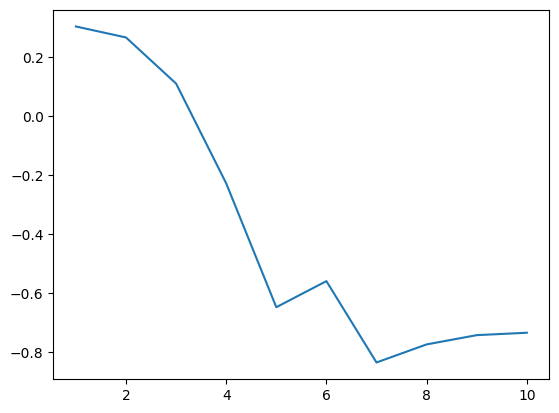

In [15]:
depths = range(1, 11)
r2 = []

for depth in depths:
    model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=depth,
                                         random_state=42)
     )
     ]
    )
    model.fit(X_train, y_train)

    r2.append(metrics.r2_score(y_test, model.predict(X_test)))


plt.plot(depths, r2)

# Завдання 6
Збережіть модель

In [16]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']